<a href="https://colab.research.google.com/github/MahnoorShahbaz/Credit-Card-Fraud-Detection/blob/main/notebooks/ML_Project_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
import pandas as pd
import zipfile

# Path to your zip file
zip_path = 'archive (2).zip'

# Access the CSV inside the zip file
with zipfile.ZipFile(zip_path, 'r') as z:
    # This line finds the name of the CSV file inside the zip
    csv_filename = [name for name in z.namelist() if name.endswith('.csv')][0]
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

# Display results
print(f"Successfully loaded: {csv_filename}")
print("Shape:", df.shape)
df.head()

Successfully loaded: creditcard.csv
Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [5]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


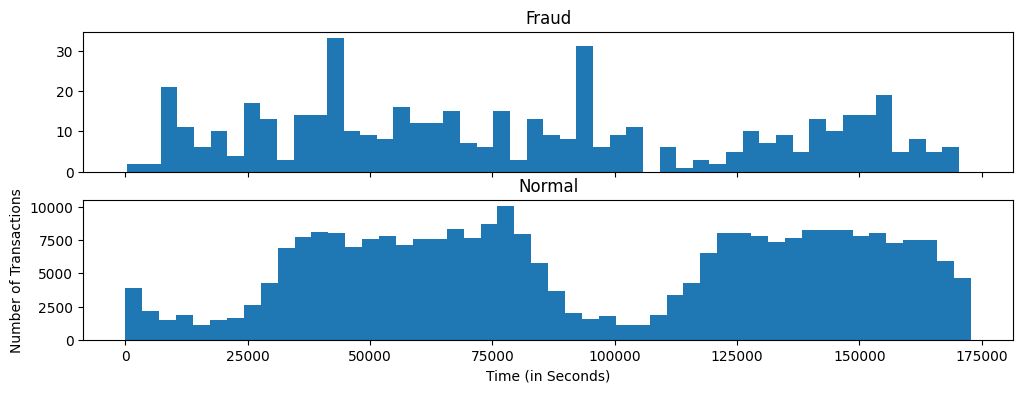

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [7]:
print ("Fraud")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


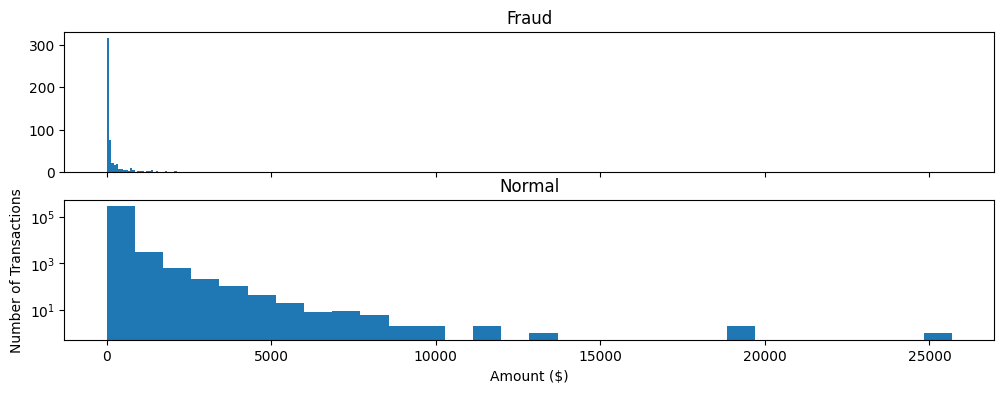

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [9]:
df['Amount_max_fraud'] = 1
df.loc[df.Amount <= 2125.87, 'Amount_max_fraud'] = 0

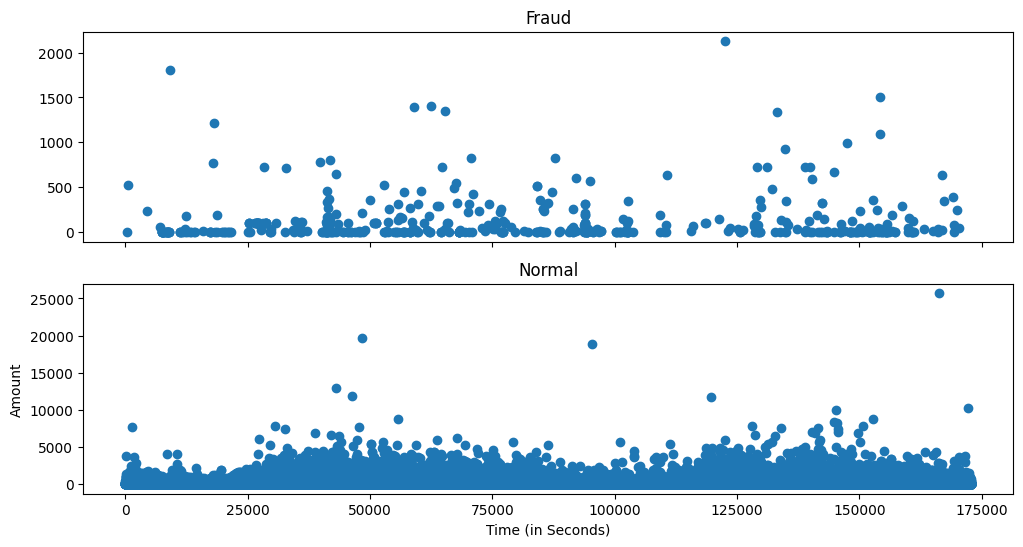

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [11]:
v_features = df.iloc[:,1:29].columns

/tmp/ipython-input-1328174175.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class == 1], bins=50)
/tmp/ipython-input-1328174175.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class == 0], bins=50)
/tmp/ipython-input-1328174175.py:5: UserWarning: 

`distplot` is a d

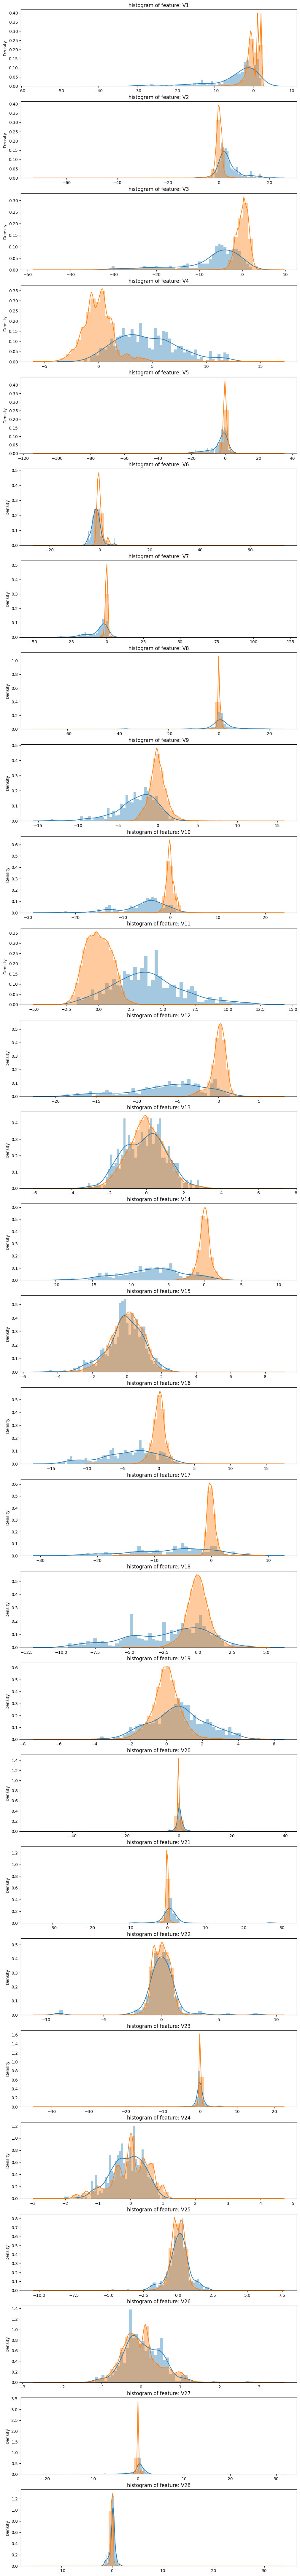

In [12]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [13]:
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

In [14]:
df['V1_'] = df.V1.map(lambda x: 1 if x < -3 else 0)
df['V2_'] = df.V2.map(lambda x: 1 if x > 2.5 else 0)
df['V3_'] = df.V3.map(lambda x: 1 if x < -4 else 0)
df['V4_'] = df.V4.map(lambda x: 1 if x > 2.5 else 0)
df['V5_'] = df.V5.map(lambda x: 1 if x < -4.5 else 0)
df['V6_'] = df.V6.map(lambda x: 1 if x < -2.5 else 0)
df['V7_'] = df.V7.map(lambda x: 1 if x < -3 else 0)
df['V9_'] = df.V9.map(lambda x: 1 if x < -2 else 0)
df['V10_'] = df.V10.map(lambda x: 1 if x < -2.5 else 0)
df['V11_'] = df.V11.map(lambda x: 1 if x > 2 else 0)
df['V12_'] = df.V12.map(lambda x: 1 if x < -2 else 0)
df['V14_'] = df.V14.map(lambda x: 1 if x < -2.5 else 0)
df['V16_'] = df.V16.map(lambda x: 1 if x < -2 else 0)
df['V17_'] = df.V17.map(lambda x: 1 if x < -2 else 0)
df['V18_'] = df.V18.map(lambda x: 1 if x < -2 else 0)
df['V19_'] = df.V19.map(lambda x: 1 if x > 1.5 else 0)
df['V21_'] = df.V21.map(lambda x: 1 if x > 0.6 else 0)

In [15]:
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0

In [16]:
df = df.rename(columns={'Class': 'Fraud'})

In [17]:
print(df.Normal.value_counts())
print()
print(df.Fraud.value_counts())

Normal
1.0    284315
0.0       492
Name: count, dtype: int64

Fraud
0    284315
1       492
Name: count, dtype: int64


In [18]:
pd.set_option("display.max_columns",101)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Fraud,Amount_max_fraud,V1_,V2_,V3_,V4_,V5_,V6_,V7_,V9_,V10_,V11_,V12_,V14_,V16_,V17_,V18_,V19_,V21_,Normal
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,149.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,2.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,378.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,123.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,69.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0


In [19]:
Fraud = df[df.Fraud == 1]
Normal = df[df.Normal == 1]

In [20]:
X_train = Fraud.sample(frac=0.8)
count_Frauds = len(X_train)

# Add 80% of the normal transactions to X_train.
X_train = pd.concat([X_train, Normal.sample(frac = 0.8)], axis = 0)

# X_test contains all the transaction not in X_train.
X_test = df.loc[~df.index.isin(X_train.index)]

In [21]:
X_train = shuffle(X_train)
X_test = shuffle(X_test)

In [22]:
y_train = X_train.Fraud
y_train = pd.concat([y_train, X_train.Normal], axis=1)

y_test = X_test.Fraud
y_test = pd.concat([y_test, X_test.Normal], axis=1)

In [23]:
X_train = X_train.drop(['Fraud','Normal'], axis = 1)
X_test = X_test.drop(['Fraud','Normal'], axis = 1)

In [24]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

227846
227846
56961
56961


In [25]:
ratio = len(X_train)/count_Frauds

y_train.Fraud *= ratio
y_test.Fraud *= ratio

In [26]:
features = X_train.columns.values

#Transform each feature in features so that it has a mean of 0 and standard deviation of 1;
#this helps with training the neural network.
for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std

/tmp/ipython-input-3803579319.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.046062 -0.046062 -0.046062 ... -0.046062 -0.046062 -0.046062]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, feature] = (X_train[feature] - mean) / std
/tmp/ipython-input-3803579319.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.046062 -0.046062 -0.046062 ... -0.046062 -0.046062 -0.046062]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, feature] = (X_test[feature] - mean) / std
/tmp/ipython-input-3803579319.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.22218109 -0.22218109 -0.22218109 ... -0.22218109 -0.22218109
 -0.22218109]' has dtype incompatible with int6

In [27]:
split = int(len(y_test)/2)

inputX = X_train.values
inputY = y_train.values
inputX_valid = X_test.values[:split]
inputY_valid = y_test.values[:split]
inputX_test = X_test.values[split:]
inputY_test = y_test.values[split:]

In [28]:
input_nodes = 37

# Multiplier maintains a fixed ratio of nodes between each layer.
mulitplier = 1.5

# Number of nodes in each hidden layer
hidden_nodes1 = 18
hidden_nodes2 = round(hidden_nodes1 * mulitplier)
hidden_nodes3 = round(hidden_nodes2 * mulitplier)

# Percent of nodes to keep during dropout.
# pkeep = tf.placeholder(tf.float32) # Removed as tf.placeholder is deprecated in TF2.x

In [29]:
import tensorflow as tf

class NeuralNetwork(tf.Module):
    def __init__(self, input_nodes, h1, h2, h3):
        super().__init__()
        self.W1 = tf.Variable(tf.random.truncated_normal([input_nodes, h1], stddev=0.15))
        self.b1 = tf.Variable(tf.zeros([h1]))

        self.W2 = tf.Variable(tf.random.truncated_normal([h1, h2], stddev=0.15))
        self.b2 = tf.Variable(tf.zeros([h2]))

        self.W3 = tf.Variable(tf.random.truncated_normal([h2, h3], stddev=0.15))
        self.b3 = tf.Variable(tf.zeros([h3]))

        self.W4 = tf.Variable(tf.random.truncated_normal([h3, 2], stddev=0.15))
        self.b4 = tf.Variable(tf.zeros([2]))

        self.drop = tf.keras.layers.Dropout(0.5)

    def __call__(self, x, training=False):
        y1 = tf.nn.sigmoid(tf.matmul(x, self.W1) + self.b1)
        y2 = tf.nn.sigmoid(tf.matmul(y1, self.W2) + self.b2)
        y3 = tf.nn.sigmoid(tf.matmul(y2, self.W3) + self.b3)
        y3 = self.drop(y3, training=training)
        return tf.nn.softmax(tf.matmul(y3, self.W4) + self.b4)


In [30]:
# Parameters
training_epochs = 5 # should be 2000, it will timeout when uploading
training_dropout = 0.9
display_step = 1 # 10
n_samples = y_train.shape[0]
batch_size = 2048
learning_rate = 0.005

In [31]:
import zipfile
import pandas as pd
import os

# Google Colab requires the full /content/ path
zip_path = '/content/archive(2).zip'

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        # Find the CSV file inside the zip automatically
        csv_filename = [name for name in z.namelist() if name.endswith('.csv')][0]
        with z.open(csv_filename) as f:
            df = pd.read_csv(f)
    print(f"✅ Successfully loaded: {csv_filename}")
else:
    print("❌ ERROR: 'archive(2).zip' not found. Ensure you uploaded it to the 'Files' tab on the left.")

❌ ERROR: 'archive(2).zip' not found. Ensure you uploaded it to the 'Files' tab on the left.


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Clean column names to remove hidden spaces
df.columns = df.columns.str.strip()

if 'Class' in df.columns:
    scaler = StandardScaler()
    # Scale all features except the 'Class' target
    X_scaled = scaler.fit_transform(df.drop('Class', axis=1))
    Y_one_hot = tf.keras.utils.to_categorical(df['Class'], num_classes=2)

    # Stratified split to keep the fraud ratio correct
    inputX, inputX_valid, inputY, inputY_valid = train_test_split(
        X_scaled, Y_one_hot, test_size=0.2, stratify=df['Class'], random_state=42
    )
    n_samples = inputX.shape[0] # Required for your training loop logic
    print("✅ Data successfully scaled and split.")
else:
    print("❌ ERROR: 'Class' column not found. Run the Data Loading cell above first.")

❌ ERROR: 'Class' column not found. Run the Data Loading cell above first.


In [44]:
accuracy_summary = []
cost_summary = []
valid_accuracy_summary = []
valid_cost_summary = []
halt_counter = 0
best_val_acc = 0.0  # Track best validation accuracy

learning_rate = 0.001
loss_fn = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

mean_train_loss = tf.keras.metrics.Mean()
mean_train_acc = tf.keras.metrics.CategoricalAccuracy()
mean_val_loss = tf.keras.metrics.Mean()
mean_val_acc = tf.keras.metrics.CategoricalAccuracy()


def forge_step(bx, by):
    bx = tf.convert_to_tensor(bx, dtype=tf.float32)
    by = tf.convert_to_tensor(by, dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(bx, training=True)
        loss = loss_fn(by, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    mean_train_loss.update_state(loss)
    mean_train_acc.update_state(by, predictions)


def probe_step(x, y):
    x = tf.convert_to_tensor(x, dtype=tf.float32)
    y = tf.convert_to_tensor(y, dtype=tf.float32)

    predictions = model(x, training=False)
    loss = loss_fn(y, predictions)

    mean_val_loss.update_state(loss)
    mean_val_acc.update_state(y, predictions)


for epoch in range(training_epochs):
    mean_train_loss.reset_state()
    mean_train_acc.reset_state()
    mean_val_loss.reset_state()
    mean_val_acc.reset_state()

    # Training loop
    for bx, by in train_ds:
        forge_step(bx, by)

    # Validation
    probe_step(inputX_valid, inputY_valid)

    # Get metrics
    ta = mean_train_acc.result().numpy()
    tl = mean_train_loss.result().numpy()
    va = mean_val_acc.result().numpy()
    vl = mean_val_loss.result().numpy()

    # Store metrics
    accuracy_summary.append(ta)
    cost_summary.append(tl)
    valid_accuracy_summary.append(va)
    valid_cost_summary.append(vl)

    if (epoch + 1) % display_step == 0:
        print(
            f"Epoch: {epoch + 1} "
            f"Acc={ta:.5f} "
            f"Loss={tl:.5f} "
            f"Val_Acc={va:.5f} "
            f"Val_Loss={vl:.5f}"
        )

    # Early stopping: stop if validation accuracy hasn't improved in 15 epochs
    if va > best_val_acc:
        best_val_acc = va
        halt_counter = 0
    else:
        halt_counter += 1
        if halt_counter >= 15:
            print(f"\nEarly stopping at epoch {epoch + 1}")
            break

print("\nOptimization Finished!\n")
print(f"Best validation accuracy: {best_val_acc:.5f}")


Epoch: 1 Acc=0.65043 Loss=2.73994 Val_Acc=0.73448 Val_Loss=9.10526
Epoch: 2 Acc=0.79206 Loss=18.84010 Val_Acc=0.80737 Val_Loss=37.72614
Epoch: 3 Acc=0.85190 Loss=42.39875 Val_Acc=0.85509 Val_Loss=62.00349
Epoch: 4 Acc=0.88450 Loss=63.83121 Val_Acc=0.87602 Val_Loss=81.87117
Epoch: 5 Acc=0.89892 Loss=82.14216 Val_Acc=0.90709 Val_Loss=74.49424

Optimization Finished!

Best validation accuracy: 0.90709


In [38]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (tf.cast(inputX, tf.float32), tf.cast(inputY, tf.float32))
).batch(batch_size)

valid_ds = tf.data.Dataset.from_tensor_slices(
    (tf.cast(inputX_valid, tf.float32), tf.cast(inputY_valid, tf.float32))
).batch(batch_size)


In [34]:
import tensorflow as tf
print(tf.executing_eagerly())


True


In [35]:
train_ds = tf.data.Dataset.from_tensor_slices((inputX, inputY))
train_ds = train_ds.batch(batch_size)


In [43]:
# Define your model first
input_dim = inputX.shape[1]
num_classes = inputY.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Then run your training loop
accuracy_summary = []
cost_summary = []
# ... rest of your code

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


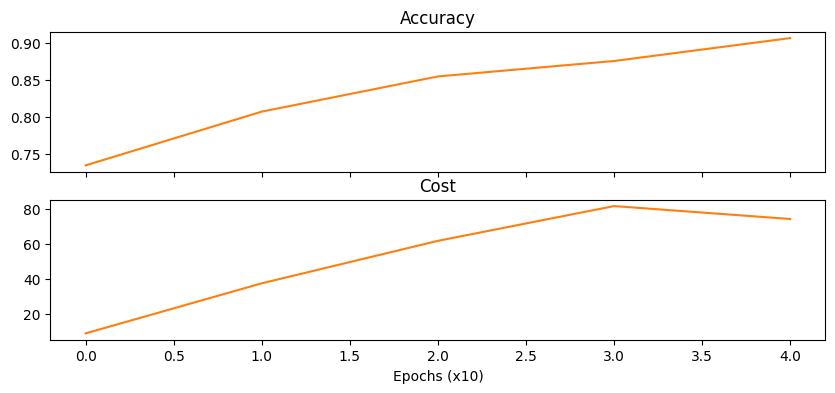

In [46]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.plot(accuracy_summary) # blue
ax1.plot(valid_accuracy_summary) # green
ax1.set_title('Accuracy')

ax2.plot(cost_summary)
ax2.plot(valid_cost_summary)
ax2.set_title('Cost')

plt.xlabel('Epochs (x10)')
plt.show()

In [48]:
import pandas as pd
import zipfile

# Path to your zip file
zip_path = 'archive (2).zip'

# Reading the CSV directly from the zip
with zipfile.ZipFile(zip_path, 'r') as z:
    # This finds the name of the CSV file inside the zip (usually creditcard.csv)
    csv_name = [f for f in z.namelist() if f.endswith('.csv')][0]
    with z.open(csv_name) as f:
        tsne_data = pd.read_csv(f)

print(f"Successfully loaded {csv_name} for t-SNE analysis.")
tsne_data.head()

Successfully loaded creditcard.csv for t-SNE analysis.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
df2 = tsne_data[tsne_data.Class == 1]
df2 = pd.concat([df2, tsne_data[tsne_data.Class == 0].sample(n = 10000)], axis = 0)

In [51]:
#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df2_std = standard_scaler.fit_transform(df2)

#Set y equal to the target values.
y = df2.iloc[:,-1].values

In [52]:
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df2_std)

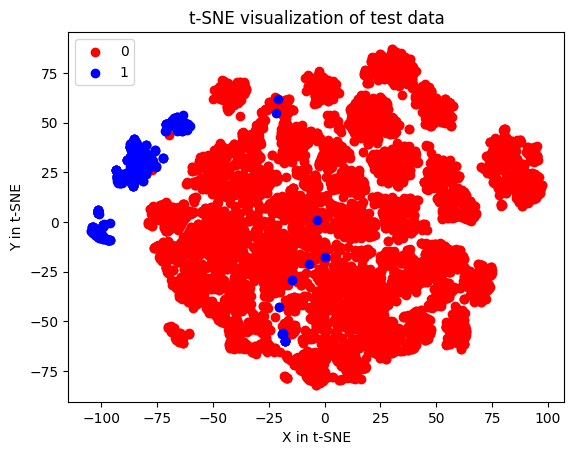

In [53]:
#Build the scatter plot with the two types of transactions.
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0],
                y = x_test_2d[y==cl,1],
                c = color_map[idx],
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

In [54]:
#Set df_used to the fraudulent transactions' dataset.
df_used = Fraud

#Add 10,000 normal transactions to df_used.
df_used = pd.concat([df_used, Normal.sample(n = 10000)], axis = 0)

In [56]:
#Scale features to improve the training ability of TSNE.
df_used_std = standard_scaler.fit_transform(df_used)

#Set y_used equal to the target values.
y_used = df_used.iloc[:,-1].values

In [57]:
x_test_2d_used = tsne.fit_transform(df_used_std)

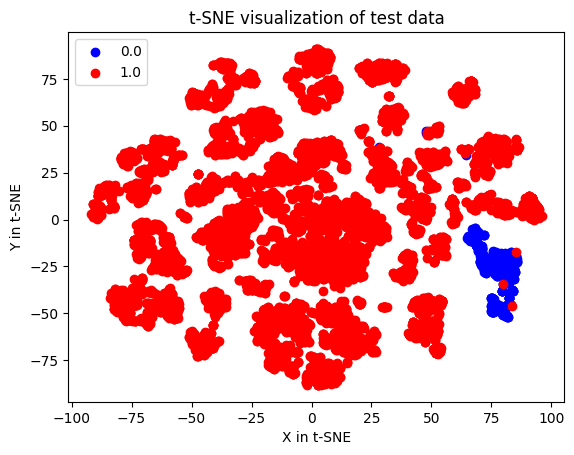

In [59]:
color_map = {1:'red', 0:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y_used)):
    plt.scatter(x=x_test_2d_used[y_used==cl,0],
                y=x_test_2d_used[y_used==cl,1],
                c=color_map[idx],
                label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()